In [86]:
#import main libraries
import pandas as pd
import numpy as np
# visualising data
import matplotlib.pyplot as plt
import seaborn as sns
# splitting data
from sklearn.model_selection import train_test_split
# models
from sklearn import tree
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [87]:
# import the dataset
df = pd.read_csv('mushrooms (1).csv')

# Data Analysis

In [88]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [89]:
# check a report of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [90]:
# unique values in each column
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [91]:
# list the unique values in each column
for col in df.columns:
    print(col, df[col].unique())
    

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


# Data Conversion

In [92]:
# change all the columns to dummies
# this will convert the columns to 0 and 1's for each category in the column
df = pd.get_dummies(df, drop_first=False, dtype=int)

In [93]:
# preview the results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: int64(119)
memory usage: 7.4 MB


In [94]:
# preview the results
df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
# is there a column named 'class_e'?
'class_e' in df.columns

# the class column is the target and p stands for poisonous so I was seeing if the dummies has split that column into class_p and class_e, if so I would need to combine them again. 

True

In [96]:
# drop the class_e column
df.drop('class_e', axis=1, inplace=True)

In [116]:
# change all column names to lowercase
df.columns = df.columns.str.lower()

In [117]:
# save this dataset to a new csv file
df.to_csv('mushrooms_dummies.csv', index=False)

#### Previewing the resulting column names

In [98]:
# list the first 10 columns
df.columns[:10]

Index(['class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s'],
      dtype='object')

In [99]:
df.columns[10:20]

Index(['cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r',
       'cap-color_u', 'cap-color_w'],
      dtype='object')

In [100]:
df.columns[20:30]

Index(['cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f',
       'odor_l', 'odor_m', 'odor_n', 'odor_p'],
      dtype='object')

In [101]:
df.columns[30:40]

Index(['odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e'],
      dtype='object')

In [102]:
df.columns[40:50]

Index(['gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y'],
      dtype='object')

In [103]:
df.columns[50:60]

Index(['stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s'],
      dtype='object')

In [104]:
df.columns[60:70]

Index(['stalk-surface-above-ring_y', 'stalk-surface-below-ring_f',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_b',
       'stalk-color-above-ring_c', 'stalk-color-above-ring_e',
       'stalk-color-above-ring_g', 'stalk-color-above-ring_n'],
      dtype='object')

In [105]:
df.columns[70:80]

Index(['stalk-color-above-ring_o', 'stalk-color-above-ring_p',
       'stalk-color-above-ring_w', 'stalk-color-above-ring_y',
       'stalk-color-below-ring_b', 'stalk-color-below-ring_c',
       'stalk-color-below-ring_e', 'stalk-color-below-ring_g',
       'stalk-color-below-ring_n', 'stalk-color-below-ring_o'],
      dtype='object')

In [106]:
df.columns[80:90]

Index(['stalk-color-below-ring_p', 'stalk-color-below-ring_w',
       'stalk-color-below-ring_y', 'veil-type_p', 'veil-color_n',
       'veil-color_o', 'veil-color_w', 'veil-color_y', 'ring-number_n',
       'ring-number_o'],
      dtype='object')

In [107]:
df.columns[90:100]

Index(['ring-number_t', 'ring-type_e', 'ring-type_f', 'ring-type_l',
       'ring-type_n', 'ring-type_p', 'spore-print-color_b',
       'spore-print-color_h', 'spore-print-color_k', 'spore-print-color_n'],
      dtype='object')

In [108]:
df.columns[100:]

Index(['spore-print-color_o', 'spore-print-color_r', 'spore-print-color_u',
       'spore-print-color_w', 'spore-print-color_y', 'population_a',
       'population_c', 'population_n', 'population_s', 'population_v',
       'population_y', 'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m',
       'habitat_p', 'habitat_u', 'habitat_w'],
      dtype='object')

# Model

In [109]:
# split the data into X and y
X = df.drop('class_p', axis=1)
y = df['class_p']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Test 1

---
Results are 100% accurate which seems unrealistic. But perhaps not, maybe there is enough data to say for certain. I would need to learn more about mushrooms to find out. 

In [110]:
# create a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [111]:
# make a prediction
y_pred = clf.predict(X_test)

In [112]:
# check the accuracy
accuracy_score(y_test, y_pred)

1.0

In [113]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


1.0

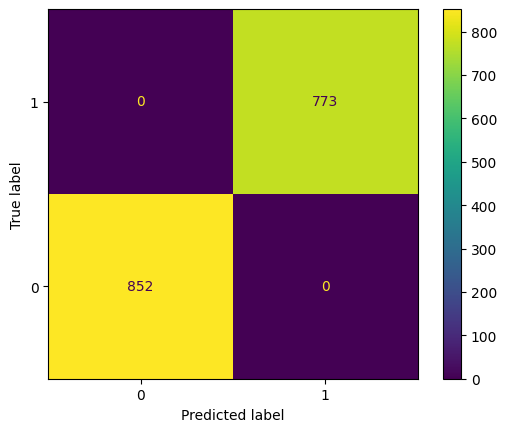

In [114]:
# show a confusion matrix
cfm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()


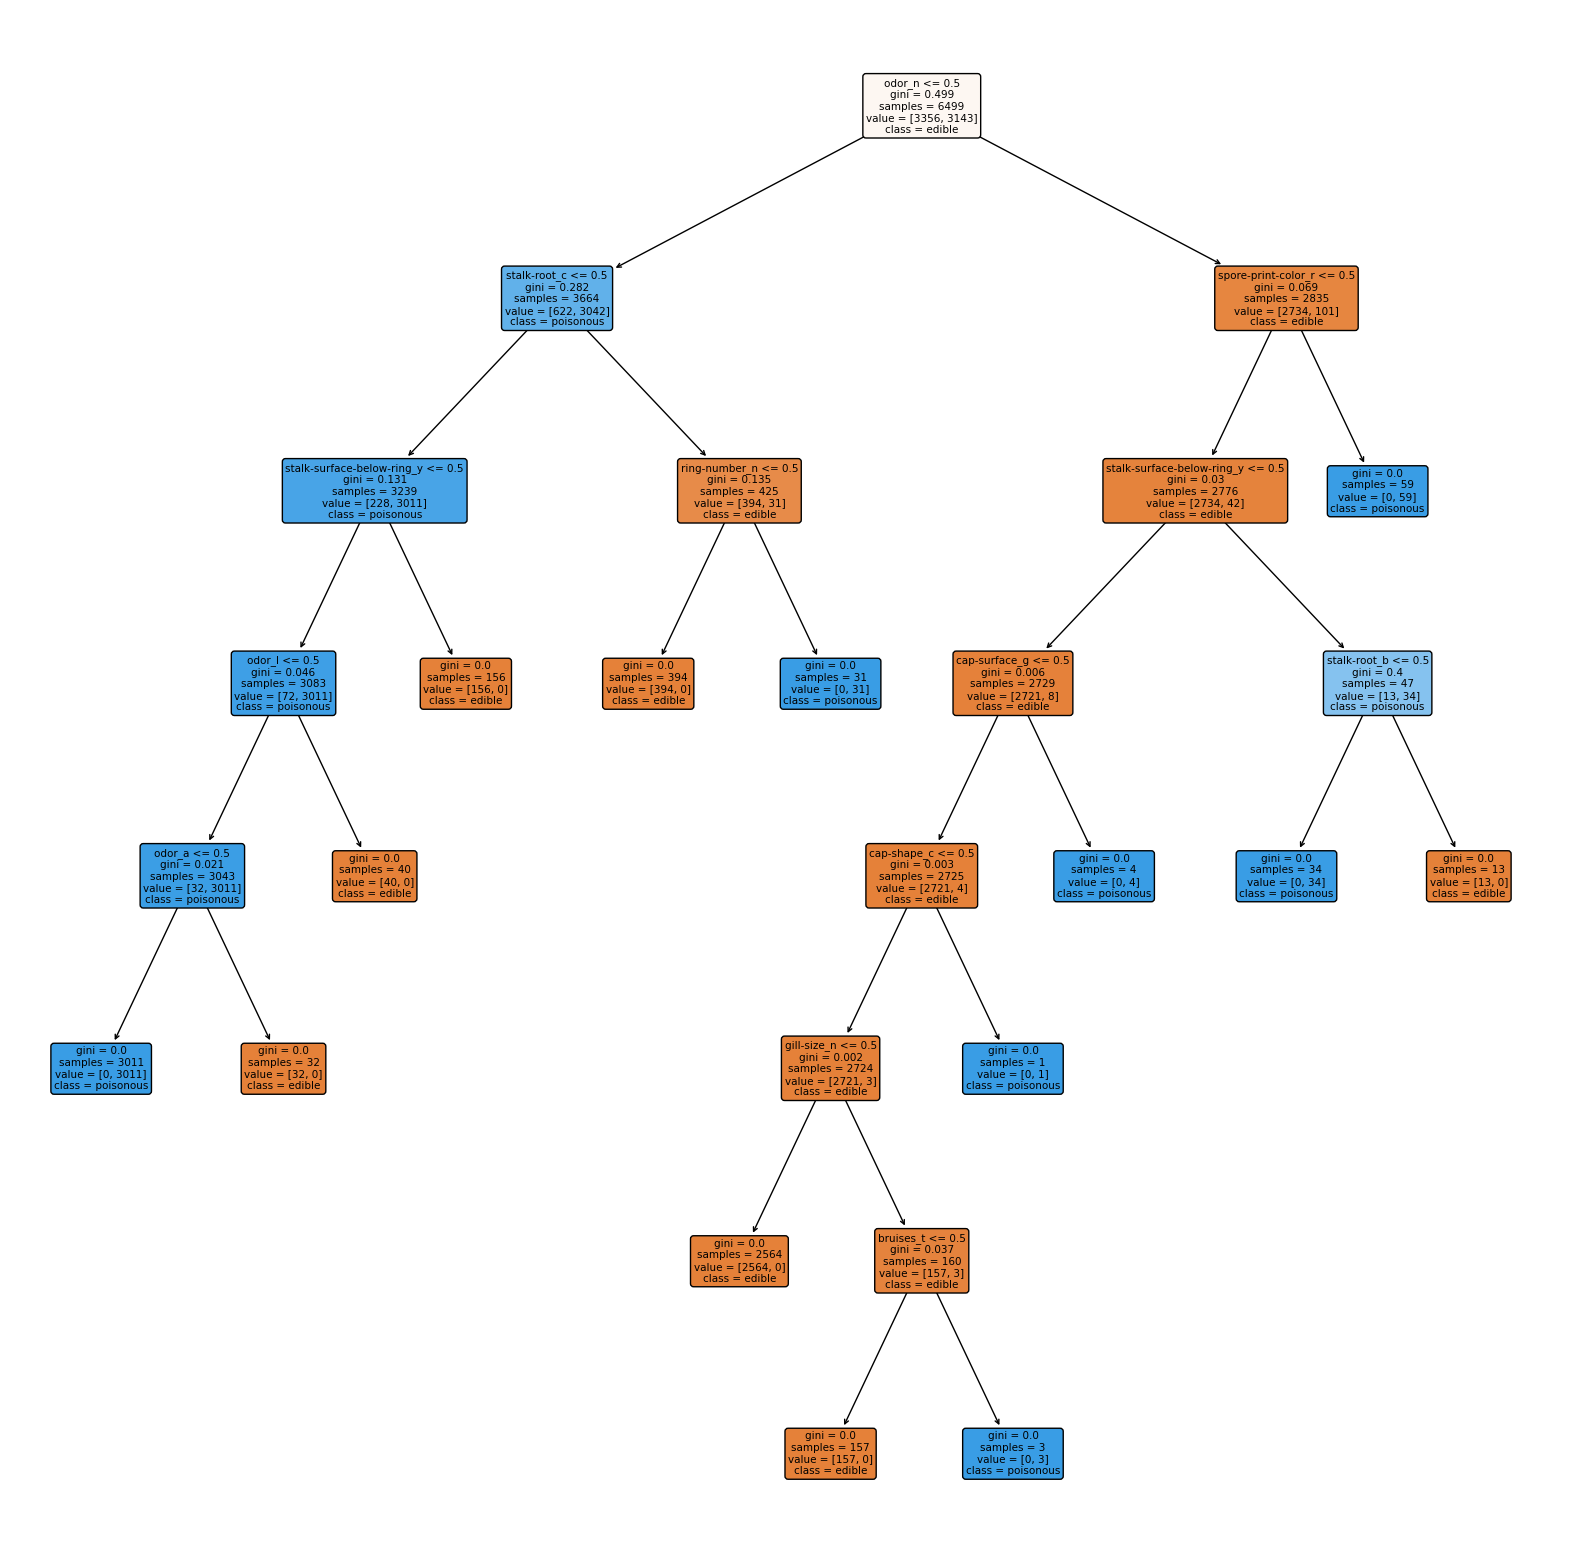

In [115]:
# plot the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, filled=True, rounded=True, class_names=['edible', 'poisonous'], feature_names=X.columns)
plt.show()
